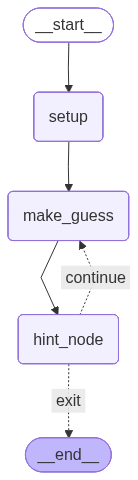

In [5]:
# !pip install langgraph
from typing import TypedDict, List
from langgraph.graph import StateGraph,START,END
import random

class AgentState(TypedDict):
  name:str
  guesses:List[int]
  attempts:int
  lower_bound:int
  upper_bound:int
  number:int

def setup(state:AgentState)->AgentState:
  """Function to generates the number that needs to be guessed"""
  state['number'] = random.randint(state['lower_bound'],state['upper_bound'])
  return state

def make_guess(state:AgentState)->AgentState:
  """Function that makes the guess"""
  state['guesses'].append(random.randint(state['lower_bound'],state['upper_bound']))
  state['attempts']+=1
  return state

def hint_node(state:AgentState)->AgentState:
  """Function to give hints"""
  if state['number'] > state['guesses'][-1]:
    state['lower_bound']=state['guesses'][-1]
  elif state['number'] < state['guesses'][-1]:
    state['upper_bound']=state['guesses'][-1]
  return state


def should_continue(state:AgentState)->AgentState:
  """Funtion that decides if game should continue or end"""
  if state['number']==state['guesses'][-1] or state['attempts']>=7:
    return "exit"
  else:
    return "continue"

graph=StateGraph(AgentState)

graph.add_node("setup",setup)
graph.add_node("make_guess",make_guess)
graph.add_node("hint_node",hint_node)

graph.add_edge(START,"setup")
graph.add_edge("setup","make_guess")
graph.add_edge("make_guess","hint_node")

graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "continue":"make_guess",
        "exit":END
    }
)

graph.compile()




In [6]:
app=graph.compile()
app.invoke({"name":"Peter", "guesses":[],"attempts":0,"lower_bound":0,"upper_bound":20})

{'name': 'Peter',
 'guesses': [2, 17, 5, 9, 14, 9, 11],
 'attempts': 7,
 'lower_bound': 11,
 'upper_bound': 14,
 'number': 12}

In [7]:
app.invoke({"name":"Peter", "guesses":[],"attempts":0,"lower_bound":0,"upper_bound":20})

{'name': 'Peter',
 'guesses': [18, 18, 11, 12],
 'attempts': 4,
 'lower_bound': 11,
 'upper_bound': 18,
 'number': 12}

In [8]:
app.invoke({"name":"Peter", "guesses":[],"attempts":0,"lower_bound":0,"upper_bound":20})

{'name': 'Peter',
 'guesses': [19, 6, 16, 10, 16, 12, 11],
 'attempts': 7,
 'lower_bound': 10,
 'upper_bound': 12,
 'number': 11}

In [9]:
app.invoke({"name":"Peter", "guesses":[],"attempts":0,"lower_bound":0,"upper_bound":20})

{'name': 'Peter',
 'guesses': [14, 0, 5, 12, 10, 5, 10],
 'attempts': 7,
 'lower_bound': 5,
 'upper_bound': 10,
 'number': 8}

In [10]:
app.invoke({"name":"Peter", "guesses":[],"attempts":0,"lower_bound":0,"upper_bound":20})

{'name': 'Peter',
 'guesses': [16, 17, 18, 19, 20],
 'attempts': 5,
 'lower_bound': 19,
 'upper_bound': 20,
 'number': 20}